Explore CC-Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import dpp.little_helper_dan as lh

Convert Dataset to usable format

In [22]:
datetime_cols = ["call_started", "call_answered", "call_ended"]

df = pd.read_csv(
    "../data/raw/call-centre-queue-simulation/simulated_call_centre.csv",
    parse_dates=["date"]
)

# Remove 'call_id' column if it exists
if 'call_id' in df.columns:
    df = df.drop(columns=['call_id'])

# Convert call time columns to datetime objects for calculation
time_format = "%I:%M:%S %p"  # Example: 01:23:45 PM
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], format=time_format)

# Example: Calculate call duration in seconds
df["call_duration"] = (df["call_ended"] - df["call_answered"]).dt.total_seconds()

display(df)
df.dtypes

,date,daily_caller,call_started,call_answered,call_ended,wait_length,service_length,meets_standard,call_duration
0,2021-01-01,1,1900-01-01 08:00:00,1900-01-01 08:00:00,1900-01-01 08:14:22,0,863,True,862.0
1,2021-01-01,2,1900-01-01 08:02:42,1900-01-01 08:02:42,1900-01-01 08:07:31,0,289,True,289.0
2,2021-01-01,3,1900-01-01 08:08:24,1900-01-01 08:08:24,1900-01-01 08:10:13,0,108,True,109.0
3,2021-01-01,4,1900-01-01 08:09:37,1900-01-01 08:09:37,1900-01-01 08:13:45,0,247,True,248.0
4,2021-01-01,5,1900-01-01 08:11:10,1900-01-01 08:11:10,1900-01-01 08:15:28,0,258,True,258.0
...,...,...,...,...,...,...,...,...,...
51703,2021-12-31,267,1900-01-01 17:50:10,1900-01-01 17:50:10,1900-01-01 17:57:26,0,436,True,436.0
51704,2021-12-31,268,1900-01-01 17:50:31,1900-01-01 17:50:31,1900-01-01 17:54:55,0,265,True,264.0
51705,2021-12-31,269,1900-01-01 17:51:29,1900-01-01 17:51:29,1900-01-01 17:54:26,0,177,True,177.0
51706,2021-12-31,270,1900-01-01 17:53:10,1900-01-01 17:54:26,1900-01-01 17:57:50,76,204,False,204.0


date              datetime64[ns]
daily_caller               int64
call_started      datetime64[ns]
call_answered     datetime64[ns]
call_ended        datetime64[ns]
wait_length                int64
service_length             int64
meets_standard              bool
call_duration            float64
dtype: object

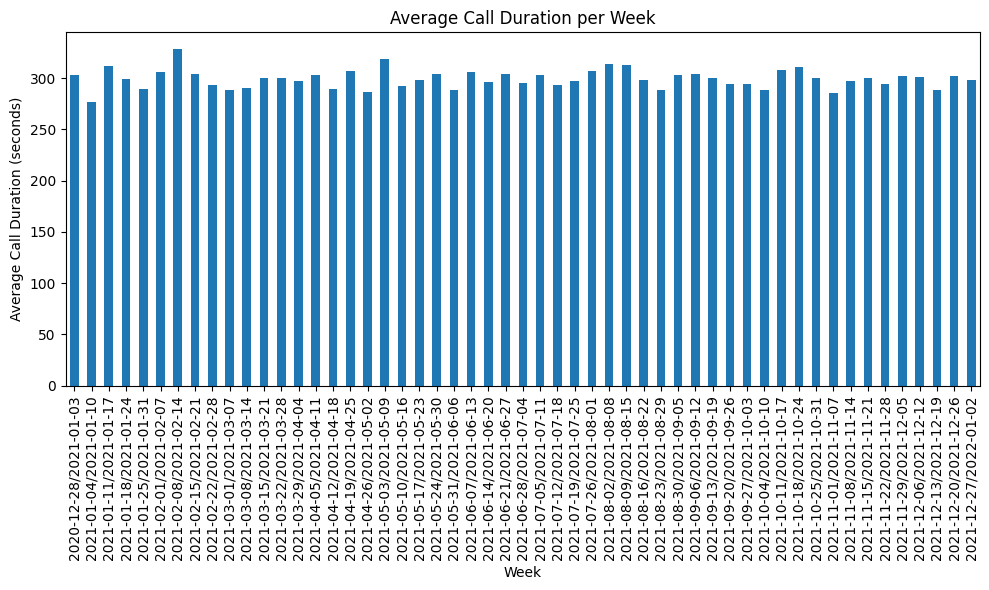

In [25]:
# Calculate average call_duration for each week
avg_call_duration_per_week = df.groupby(df['date'].dt.to_period('W'))["call_duration"].mean()

# Visualize the result
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
avg_call_duration_per_week.plot(kind='bar')
plt.ylabel('Average Call Duration (seconds)')
plt.xlabel('Week')
plt.title('Average Call Duration per Week')
plt.tight_layout()
plt.show()

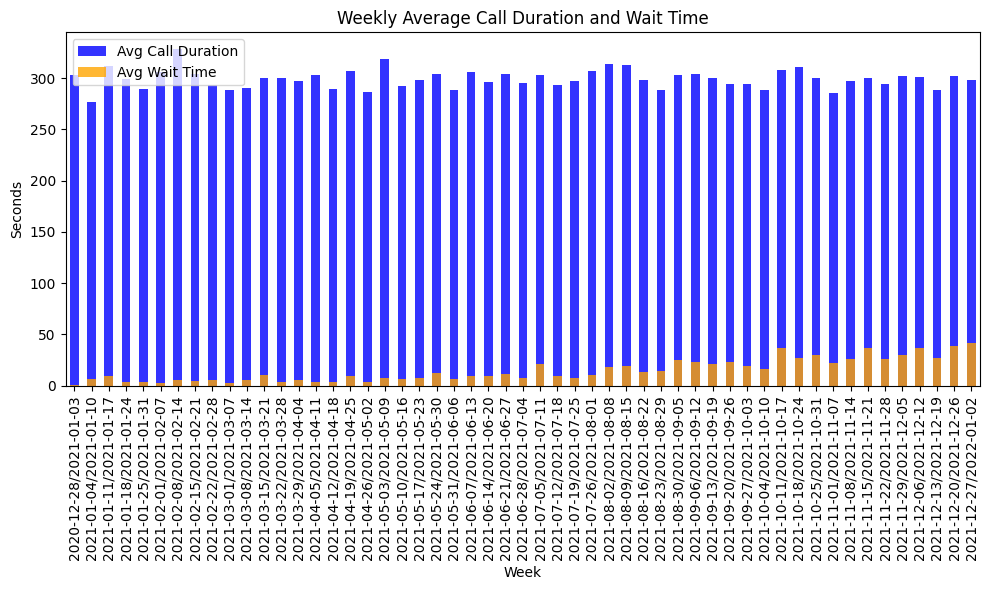

In [27]:
# Calculate wait time (in seconds) as the difference between call_answered and call_started
df['wait_time'] = (df['call_answered'] - df['call_started']).dt.total_seconds()

# Calculate average call duration and wait time per week
avg_call_duration_per_week = df.groupby(df['date'].dt.to_period('W'))['call_duration'].mean()
avg_wait_time_per_week = df.groupby(df['date'].dt.to_period('W'))['wait_time'].mean()

# Overlay both graphs
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
avg_call_duration_per_week.plot(kind='bar', alpha=0.8, color='blue', label='Avg Call Duration')
avg_wait_time_per_week.plot(kind='bar', alpha=0.8, color='orange', label='Avg Wait Time')
plt.ylabel('Seconds')
plt.xlabel('Week')
plt.title('Weekly Average Call Duration and Wait Time')
plt.legend()
plt.tight_layout()
plt.show()

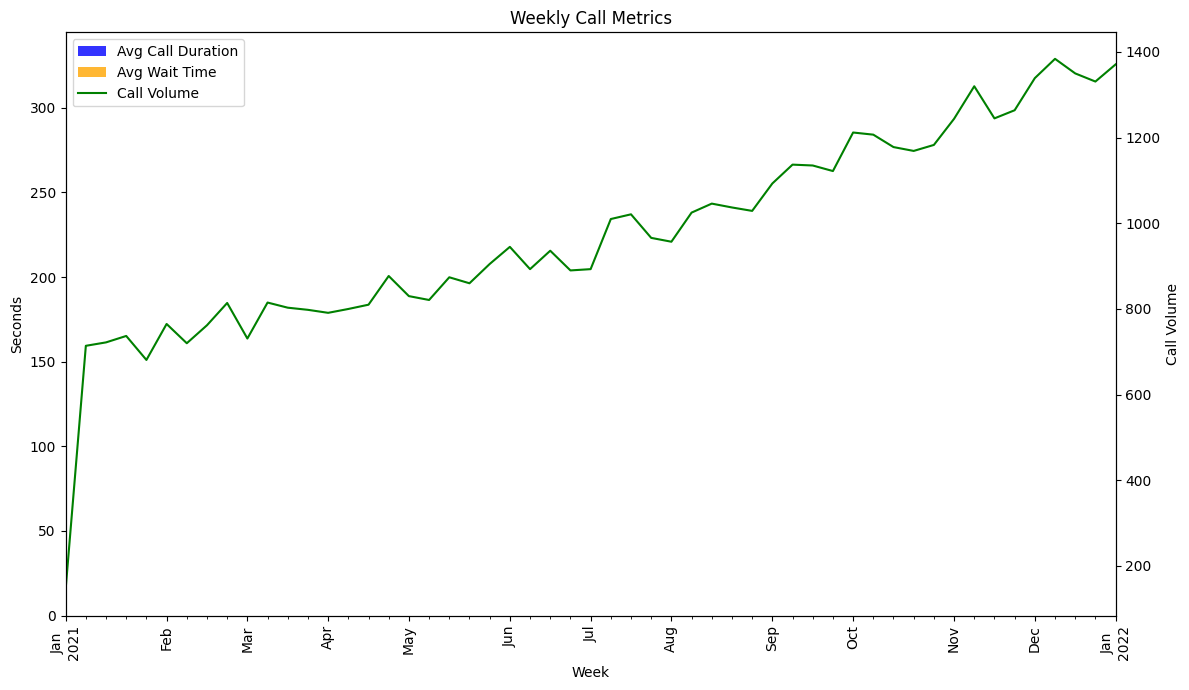

In [29]:
# Calculate weekly metrics
avg_call_duration_per_week = df.groupby(df['date'].dt.to_period('W'))['call_duration'].mean()
avg_wait_time_per_week = df.groupby(df['date'].dt.to_period('W'))['wait_time'].mean()
call_volume_per_week = df.groupby(df['date'].dt.to_period('W')).size()

# Combine all three graphs
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12,7))

# Plot call duration and wait time on left y-axis
avg_call_duration_per_week.plot(kind='bar', alpha=0.8, color='blue', label='Avg Call Duration', ax=ax1)
avg_wait_time_per_week.plot(kind='bar', alpha=0.8, color='orange', label='Avg Wait Time', ax=ax1)
ax1.set_ylabel('Seconds')
ax1.set_xlabel('Week')
ax1.set_title('Weekly Call Metrics')

# Plot call volume on right y-axis
ax2 = ax1.twinx()
call_volume_per_week.plot(kind='line', color='green', label='Call Volume', ax=ax2)
ax2.set_ylabel('Call Volume')

# Legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()